# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [2]:
# import libraries here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

%matplotlib inline
pd.set_option('display.max_columns', None)

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [3]:
# YOUR CODE HERE
data = pd.read_csv('Temp_States.csv')
temp = data.copy()

#### Print `temp`

In [4]:
# your solution here
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [5]:
# YOUR CODE HERE
temp.dtypes

# data types
# City - string
# State - string
# Temperature - float64

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [6]:
# YOUR CODE HERE
temp_new_york = temp[temp['State']=='New York']

#### What is the average of the temperature of cities in New York?

In [7]:
# YOUR CODE HERE
temp_new_york['Temperature'].mean()

np.float64(10.74074074074074)

#### We want to know cities and states with Temperature above 15 degress Celcius

In [8]:
# your answer here
temp.loc[temp['Temperature'] > 15, ['City', 'State']]

,City,State
0,NYC,New York
3,Hartford,Connecticut
5,Treton,New Jersey
6,Newark,New Jersey


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [9]:
# YOUR CODE HERE
temp.loc[temp['Temperature'] > 15, ['City']]

,City
0,NYC
3,Hartford
5,Treton
6,Newark


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [10]:
# YOUR CODE HERE
temp.loc[(temp['Temperature']>15)&(temp['Temperature']<20), ['City']]

,City
0,NYC
3,Hartford


In [11]:
temp['State'].value_counts()

State
New York       3
Connecticut    2
New Jersey     2
Name: count, dtype: int64

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [12]:
# YOUR CODE HERE
temp.groupby('State')['Temperature'].agg(['mean', 'std'])

,mean,std
State,,
Connecticut,15.833333,1.964186
New Jersey,21.111111,1.571348
New York,10.740741,8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [13]:
# YOUR CODE HERE
data1 = pd.read_csv('employee.csv')
employee = data1.copy()

#### Explore the data types of the Temp dataframe. Comment your results

In [14]:
# YOUR CODE HERE
employee.dtypes

# data types
# Name, Department, Education, Gender, Title - string
# Years, Salary - int 64
# Gender could be interpreted as boolean in this case

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

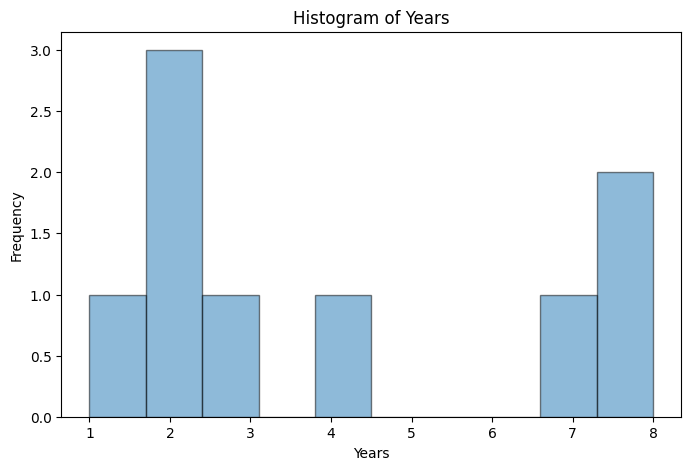

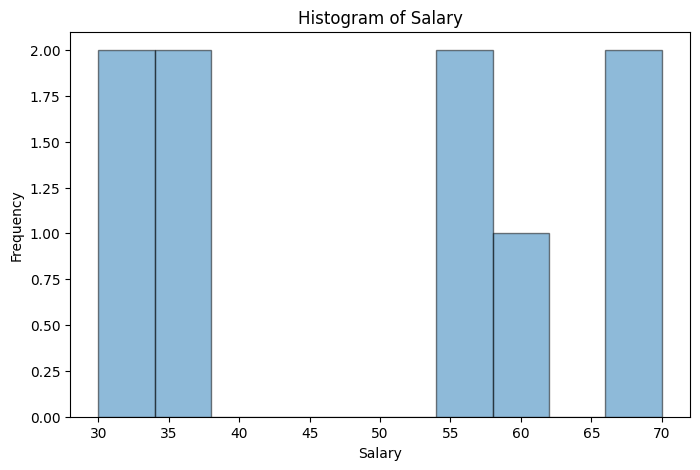

In [15]:
# your answer here
plt.figure(figsize=(8, 5))
plt.hist(employee['Years'], bins=10, edgecolor='black', alpha=0.5)
plt.title("Histogram of Years")
plt.xlabel("Years")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 5))
plt.hist(employee['Salary'], bins=10, edgecolor='black', alpha=0.5)
plt.title("Histogram of Salary")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

# there are gaps in both histograms

#### What's the average salary in this company?

In [16]:
# YOUR CODE HERE
employee['Salary'].mean()

np.float64(48.888888888888886)

#### What's the highest salary?

In [17]:
# YOUR CODE HERE
employee['Salary'].max()

70

#### What's the lowest salary?

In [18]:
# YOUR CODE HERE
employee['Salary'].min()

30

#### Who are the employees with the lowest salary?

In [19]:
# YOUR CODE HERE
employee.loc[employee['Salary'] == employee['Salary'].min(),['Name']]

,Name
1,Maria
2,David


#### Could you give all the information about an employee called David?

In [20]:
# YOUR CODE HERE
employee[employee['Name']=='David']

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [21]:
# YOUR CODE HERE
employee.loc[employee['Name'] == 'David', 'Salary']

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [22]:
# YOUR CODE HERE
employee[employee['Title']=='associate']


,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [23]:
# YOUR CODE HERE
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [24]:
# YOUR CODE HERE
employee.iloc[0:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [25]:
# YOUR CODE HERE
employee[(employee['Title']=='associate')&(employee['Salary']>55)]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [26]:
# YOUR CODE HERE
employee.groupby('Years')['Salary'].mean().round(2)

Years
1    35.00
2    38.33
3    55.00
4    35.00
7    60.00
8    70.00
Name: Salary, dtype: float64

####  What is the average Salary per title?

In [27]:
# YOUR CODE HERE
title_sal = employee.groupby('Title')['Salary'].mean().round(2)
title_sal

Title
VP           70.00
analyst      32.50
associate    56.67
Name: Salary, dtype: float64

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.

* Hint : Quantiles vs Quartiles*
In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.

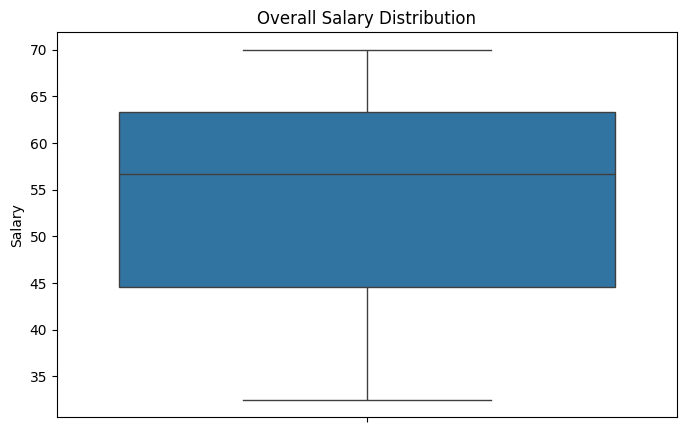

In [28]:
# YOUR CODE HERE
plt.figure(figsize=(8, 5))
sns.boxplot(y=title_sal)
plt.title('Overall Salary Distribution')
plt.ylabel('Salary')
plt.show()


In [29]:
# print first quartile here
employee['Salary'].quantile(0.25)

np.float64(35.0)

In [30]:
# print third quartile here
employee['Salary'].quantile(0.75)

np.float64(60.0)

#### Is the mean salary per gender different?

In [31]:
# your answer here
employee.groupby('Gender')['Salary'].mean() # yes

Gender
F    47.5
M    50.0
Name: Salary, dtype: float64

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [32]:
# your answer here
employee.groupby('Department')[['Years', 'Salary']].agg(['min','mean', 'max'])

Years               Salary           
             min      mean max    min   mean max
Department                                      
HR             2  4.666667   8     30  45.00  70
IT             1  4.500000   8     30  48.75  70
Sales          2  2.500000   3     55  55.00  55

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [33]:
# your answer here
dep_sal = employee.groupby('Department')['Salary'].agg(['max', 'min'])
dep_sal['difference'] = dep_sal.apply(lambda row : row['max'] - row['min'], axis=1)
dep_sal

,max,min,difference
Department,,,
HR,70,30,40
IT,70,30,40
Sales,55,55,0


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [34]:
# your answer here
data2 = pd.read_csv('Orders.csv')
orders = data2.copy()

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [35]:
# your answer here
orders.dtypes

# StockCode, Description, InvoiceDate, Country - are strings, the rest of the columns are numeric

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [36]:
# your answer here
orders.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,397924.0,278465.221859,152771.368303,0.0,148333.75,284907.50,410079.25,541908.00
InvoiceNo,397924.0,560617.126645,13106.167695,536365.0,549234.00,561893.00,572090.00,581587.00
year,397924.0,2010.934259,0.247829,2010.0,2011.00,2011.00,2011.00,2011.00
month,397924.0,7.612537,3.416527,1.0,5.00,8.00,11.00,12.00
day,397924.0,3.614555,1.928274,1.0,2.00,3.00,5.00,7.00
hour,397924.0,12.728247,2.273535,6.0,11.00,13.00,14.00,20.00
Quantity,397924.0,13.021823,180.420210,1.0,2.00,6.00,12.00,80995.00
UnitPrice,397924.0,3.116174,22.096788,0.0,1.25,1.95,3.75,8142.75
CustomerID,397924.0,15294.315171,1713.169877,12346.0,13969.00,15159.00,16795.00,18287.00
amount_spent,397924.0,22.394749,309.055588,0.0,4.68,11.80,19.80,168469.60


In [37]:
orders.head(15)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
5,5,536365,22752,2010,12,3,8,set 7 babushka nesting boxes,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30
6,6,536365,21730,2010,12,3,8,glass star frosted t-light holder,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50
7,7,536366,22633,2010,12,3,8,hand warmer union jack,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
8,8,536366,22632,2010,12,3,8,hand warmer red polka dot,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
9,9,536367,84879,2010,12,3,8,assorted colour bird ornament,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08


####  What is the average Purchase Price?

In [38]:
# your answer here
orders.amount_spent.mean().round(2)

np.float64(22.39)

#### What were the highest and lowest purchase prices? 

In [39]:
# your answer here
orders.amount_spent.min()

0.0

In [40]:
# your answer here
orders.amount_spent.max()

168469.6

#### Select all the customers we have in Spain

In [41]:
# your answer here
orders[orders['Country']=='Spain']

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394733,535271,581193,23291,2011,12,3,17,dolly girl childrens cup,2,2011-12-07 17:05:00,1.25,17097,Spain,2.50
394734,535272,581193,85232D,2011,12,3,17,set/3 decoupage stacking tins,1,2011-12-07 17:05:00,4.95,17097,Spain,4.95
394735,535273,581193,22721,2011,12,3,17,set of 3 cake tins sketchbook,2,2011-12-07 17:05:00,1.95,17097,Spain,3.90
394736,535274,581193,23241,2011,12,3,17,treasure tin gymkhana design,1,2011-12-07 17:05:00,2.08,17097,Spain,2.08


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [42]:
# your answer here
orders[orders['Country']=='Spain'].value_counts().sum()

np.int64(2485)

#### Select all the customers who have bought more than 50 items ?

In [43]:
# your answer here
invoice_quant = orders.groupby('InvoiceNo')['Quantity'].count().sort_values(ascending=False)
invoice_quant_filtered = invoice_quant[invoice_quant > 50]
invoice_quant_filtered

InvoiceNo
576339    542
579196    533
580727    529
578270    442
573576    435
         ... 
544040     51
538255     51
569302     51
547871     51
557278     51
Name: Quantity, Length: 1653, dtype: int64

#### Select orders from Spain that are above 50 items

In [44]:
# your answer here
orders_spain = orders[(orders['Country']=='Spain')&(orders['Quantity']>50)]
orders_spain

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
32454,52416,540785,84997B,2011,1,2,11,red 3 piece retrospot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
32455,52417,540785,84997D,2011,1,2,11,pink 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32456,52418,540785,84997C,2011,1,2,11,blue 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32457,52419,540785,84997A,2011,1,2,11,green 3 piece polkadot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
91155,136767,547972,22383,2011,3,1,16,lunch bag suki design,150,2011-03-28 16:41:00,1.45,12557,Spain,217.50


#### Select all free orders

In [45]:
# your answer here
orders[orders['amount_spent']==0]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
34494,56674,541109,22168,2011,1,4,15,organiser wood antique white,1,2011-01-13 15:10:00,0.0,15107,United Kingdom,0.0
53788,86789,543599,84535B,2011,2,4,13,fairy cakes notebook a6 size,16,2011-02-10 13:08:00,0.0,17560,United Kingdom,0.0
85671,130188,547417,22062,2011,3,3,10,ceramic bowl with love heart design,36,2011-03-23 10:25:00,0.0,13239,United Kingdom,0.0
92875,139453,548318,22055,2011,3,3,12,mini cake stand hanging strawbery,5,2011-03-30 12:45:00,0.0,13113,United Kingdom,0.0
97430,145208,548871,22162,2011,4,1,14,heart garland rustic padded,2,2011-04-04 14:42:00,0.0,14410,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [46]:
# your answer here
lunch_bag = orders[orders['Description'].str.contains('lunch bag', case=False, na=False)]
print(lunch_bag)

        Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
93              93     536378     20725  2010     12    3     9   
172            174     536385     22662  2010     12    3     9   
354            363     536401     22662  2010     12    3    11   
359            368     536401     20725  2010     12    3    11   
360            369     536401     22382  2010     12    3    11   
...            ...        ...       ...   ...    ...  ...   ...   
397465      540436     581486     23207  2011     12    5     9   
397713      541695     581538     20727  2011     12    5    11   
397714      541696     581538     20725  2011     12    5    11   
397877      541862     581581     23681  2011     12    5    12   
397880      541865     581583     20725  2011     12    5    12   

                        Description  Quantity          InvoiceDate  UnitPrice  \
93          lunch bag red retrospot        10  2010-12-01 09:37:00       1.65   
172     lunch bag dolly girl desi

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [47]:
# your answer here
orders[(orders['year']==2011)&(orders['Description'].str.contains('lunch bag', case=False, na=False))]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Show the frequency distribution of the amount spent in Spain.

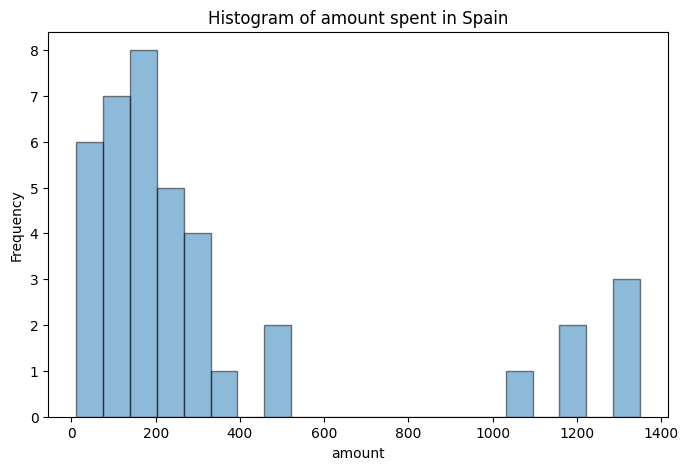

In [48]:
# your answer here
plt.figure(figsize=(8, 5))
plt.hist(orders_spain['amount_spent'], bins=21, edgecolor='black', alpha=0.5)
plt.title("Histogram of amount spent in Spain")
plt.xlabel("amount")
plt.ylabel("Frequency")
plt.show()


#### Select all orders made in the month of August

In [49]:
# your answer here
orders[orders['month']== 8]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226483,320688,565067,22644,2011,8,3,17,ceramic cherry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226484,320689,565067,22645,2011,8,3,17,ceramic heart fairy cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226485,320690,565067,22637,2011,8,3,17,piggy bank retrospot,2,2011-08-31 17:16:00,2.55,15856,United Kingdom,5.10
226486,320691,565067,22646,2011,8,3,17,ceramic strawberry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [50]:
# your answer here
orders[orders['month'] == 8].groupby('Country').value_counts()

Country      Unnamed: 0  InvoiceNo  StockCode  year  month  day  hour  Description                          Quantity  InvoiceDate          UnitPrice  CustomerID  amount_spent
Australia    299898      563179     23268      2011  8      5    14    set of 2 ceramic christmas reindeer  12        2011-08-12 14:19:00  1.45       12431       17.40           1
             299899      563179     23344      2011  8      5    14    jumbo bag 50's christmas             10        2011-08-12 14:19:00  2.08       12431       20.80           1
             299900      563179     21164      2011  8      5    14    home sweet home metal sign           6         2011-08-12 14:19:00  2.95       12431       17.70           1
             299901      563179     21731      2011  8      5    14    red toadstool led night light        288       2011-08-12 14:19:00  1.45       12431       417.60          1
             299902      563179     23158      2011  8      5    14    set of 5 lucky cat magnets        

#### What's the  average amount of money spent by country

In [51]:
# your answer here
orders.groupby('Country')['amount_spent'].mean()

Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

#### What's the most expensive item?

In [52]:
# your answer here
orders['UnitPrice'].max()

8142.75

#### What was the average amount spent per year ?

In [53]:
# your answer here
orders.groupby('year')['amount_spent'].mean(9)


year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64